In [11]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download required NLTK data (safe to rerun)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load data
df = pd.read_csv('../data/raw/IMDB_Dataset.csv')
print(f"✅ Loaded {len(df)} reviews")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Loaded 50000 reviews


In [12]:
# Basic cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)         # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)     # Remove special chars/digits
    text = re.sub(r'\s+', ' ', text).strip()    # Remove extra whitespace
    return text

# Advanced: tokenize, remove stopwords, lemmatize
def advanced_preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


In [13]:
print("🔄 Preprocessing all reviews...")

# Apply both functions
df['cleaned_review'] = df['review'].apply(clean_text)
df['processed_review'] = df['review'].apply(advanced_preprocess)

# Compare lengths
df['original_length'] = df['review'].str.len()
df['processed_length'] = df['processed_review'].str.len()

print("📊 Preprocessing Impact:")
print(f"Average original length: {df['original_length'].mean():.0f} characters")
print(f"Average processed length: {df['processed_length'].mean():.0f} characters")
print(f"Reduction: {((df['original_length'].mean() - df['processed_length'].mean()) / df['original_length'].mean() * 100):.1f}%")

# Show examples
df[['review', 'cleaned_review', 'processed_review']].head(3)


🔄 Preprocessing all reviews...
📊 Preprocessing Impact:
Average original length: 1309 characters
Average processed length: 815 characters
Reduction: 37.7%


,review,cleaned_review,processed_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one reviewer mentioned watching episode youll ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...


In [6]:
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize("Hello world!")


['Hello', 'world', '!']

In [8]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import nltk

nltk.download('punkt')                        # Tokenizer
nltk.download('stopwords')                    # Stopword list
nltk.download('wordnet')                      # Lemmatizer dictionary
nltk.download('averaged_perceptron_tagger')   # POS tagger for lemmatizer
nltk.download('omw-1.4')                      # WordNet lemmatization support


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

print("✅ Tokenization Test:", word_tokenize("Hello world!"))
print("✅ Stopwords Test:", stopwords.words('english')[:5])
lemmatizer = WordNetLemmatizer()
print("✅ Lemmatization Test:", lemmatizer.lemmatize("running"))


✅ Tokenization Test: ['Hello', 'world', '!']
✅ Stopwords Test: ['a', 'about', 'above', 'after', 'again']
✅ Lemmatization Test: running


In [2]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jeeva\AppData\Roaming\nltk_data...
[

False

In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jeeva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

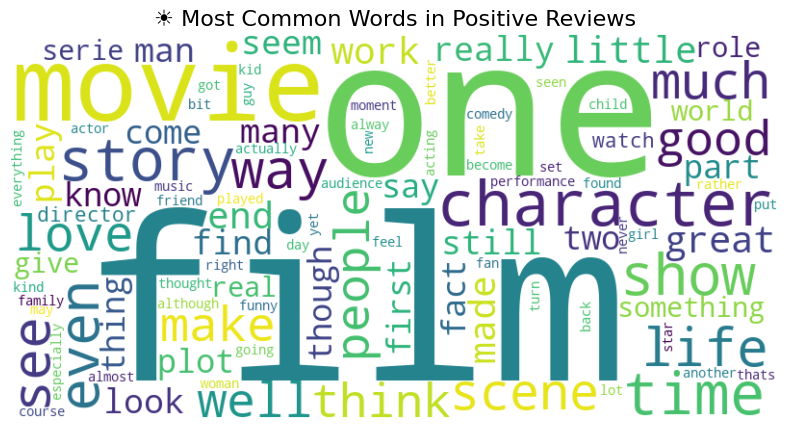

e:\sentiment-analysis-project\sentiment_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


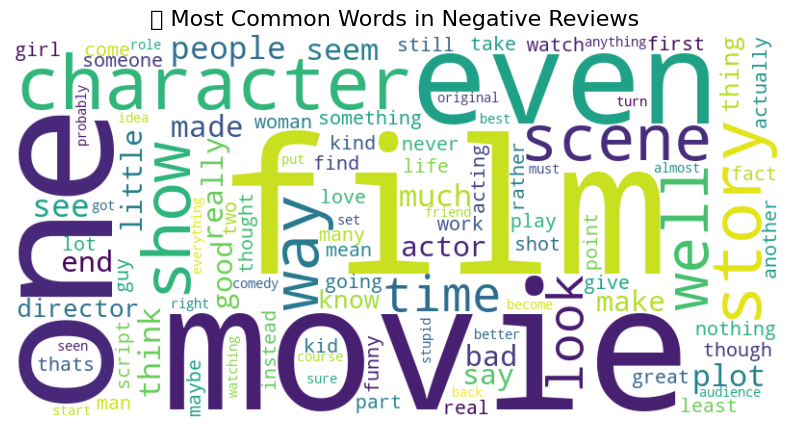

In [14]:
# Word cloud generator
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100, colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Word cloud for positive
positive_text = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
create_wordcloud(positive_text, '☀ Most Common Words in Positive Reviews')

# Word cloud for negative
negative_text = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])
create_wordcloud(negative_text, '⛈ Most Common Words in Negative Reviews')


In [15]:
# Save processed data
df_processed = df[['processed_review', 'sentiment']].copy()
df_processed.to_csv('E:/sentiment-analysis-project/data/processed/processed_reviews.csv', index=False)

print("💾 Processed data saved to '../data/processed/processed_reviews.csv'")
print(f"✅ Dataset ready for modeling with {len(df_processed)} samples")


💾 Processed data saved to '../data/processed/processed_reviews.csv'
✅ Dataset ready for modeling with 50000 samples
